## SCENARIO 1: A 2-headed coin

In [4]:
fair_coin = Die(['H', 'T'])
fair_coin2 = Die(['H', 'T'])
fair_coin3 = Die(['H', 'T'])
unfair_coin_1 = Die(['H', 'T'])
unfair_coin_1.change_weight('H', 5)  # Setting weight 5 for face 'H'

unfair_coin_2 = Die(['H', 'T'])
unfair_coin_2.change_weight('T', 5)  # Setting weight 5 for face 'T'

game1 = Game([fair_coin, fair_coin2, fair_coin3])
game2 = Game([fair_coin, unfair_coin_1, unfair_coin_2])


In [5]:
# Create Analyzer objects
analyzer1 = Analyzer([game1])
analyzer2 = Analyzer([game2])

# Compute jackpot frequencies
jackpot_freq_game1 = analyzer1.compute_jackpot(1500)
jackpot_freq_game2 = analyzer2.compute_jackpot(1500)

jackpot_results_game1 = jackpot_freq_game1[jackpot_freq_game1['jackpot_count'] > 0]
jackpot_results_game2 = jackpot_freq_game2[jackpot_freq_game2['jackpot_count'] > 0]

print("Jackpot results for Game 1:")
print(jackpot_results_game1)

print("\nJackpot results for Game 2:")
print(jackpot_results_game2)


Jackpot results for Game 1:
Empty DataFrame
Columns: [roll_number, jackpot_count]
Index: []

Jackpot results for Game 2:
Empty DataFrame
Columns: [roll_number, jackpot_count]
Index: []


In [6]:
jackpot_results_game1 = jackpot_freq_game1[jackpot_freq_game1['jackpot_count'] > 0]
jackpot_results_game2 = jackpot_freq_game2[jackpot_freq_game2['jackpot_count'] > 0]

print("Jackpot results for Game 1:")
print(jackpot_results_game1)

print("\nJackpot results for Game 2:")
print(jackpot_results_game2)

Jackpot results for Game 1:
Empty DataFrame
Columns: [roll_number, jackpot_count]
Index: []

Jackpot results for Game 2:
Empty DataFrame
Columns: [roll_number, jackpot_count]
Index: []


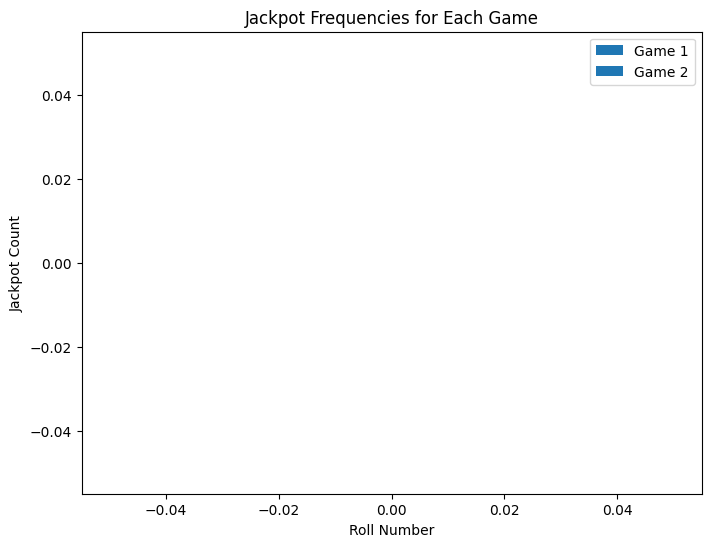

In [13]:
import matplotlib.pyplot as plt

# Create a bar chart for game 1
plt.figure(figsize=(8, 6))
plt.bar(jackpot_results_game1.index, jackpot_results_game1['jackpot_count'], color='blue', label='Game 1')

# Create a bar chart for game 2
plt.bar(jackpot_results_game2.index, jackpot_results_game2['jackpot_count'], color='orange', label='Game 2')

plt.xlabel('Roll Number')
plt.ylabel('Jackpot Count')
plt.title('Jackpot Frequencies for Each Game')
plt.legend()
plt.show()

## Scenario 2: A 6-sided die

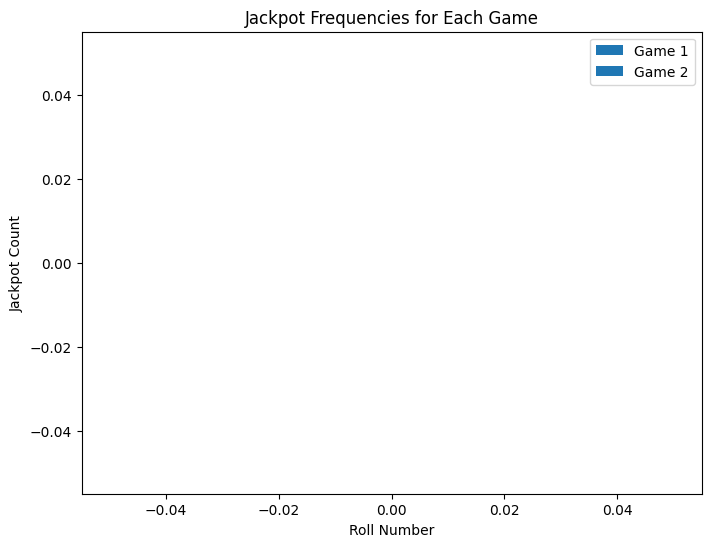

In [14]:
# Create fair dice
fair_die_faces = [1, 2, 3, 4, 5, 6]
fair_dice = [Die(fair_die_faces) for _ in range(5)]  # 5 fair dice

# Create unfair dice (Type 1)
unfair_type1_faces = [1, 2, 3, 4, 5, 6]
unfair_type1_weights = [1, 1, 1, 1, 1, 5]  # Face 6 has weight 5
unfair_dice_type1 = Die(unfair_type1_faces)
unfair_dice_type1.change_weight(6,5)

# Create unfair dice (Type 2)
unfair_type2_faces = [1, 2, 3, 4, 5, 6]
unfair_type2_weights = [5, 1, 1, 1, 1, 1]  # Face 1 has weight 5
unfair_dice_type2 = Die(unfair_type2_faces)
unfair_dice_type2.change_weight(1,5)

# Create the game setups
game1_dice = fair_dice * 5
game2_dice = [unfair_dice_type1] * 2 + [unfair_dice_type2] + fair_dice * 2

# Create game objects
game1 = Game(game1_dice)
game2 = Game(game2_dice)

# Play the games
num_rolls = 10000
game1_results = game1.play(num_rolls)
game2_results = game2.play(num_rolls)

# Create Analyzer objects for each game
analyzer_game1 = Analyzer([game1])
analyzer_game2 = Analyzer([game2])

# Filter data for non-zero jackpot counts
jackpot_results_game1 = jackpot_freq_game1[jackpot_freq_game1['jackpot_count'] > 0]
jackpot_results_game2 = jackpot_freq_game2[jackpot_freq_game2['jackpot_count'] > 0]

# Convert the 'jackpot_count' column to integers
jackpot_results_game1['jackpot_count'] = jackpot_results_game1['jackpot_count'].astype(int)
jackpot_results_game2['jackpot_count'] = jackpot_results_game2['jackpot_count'].astype(int)

# Create a bar chart for game 1
plt.figure(figsize=(8, 6))
plt.bar(jackpot_results_game1.index, jackpot_results_game1['jackpot_count'], color='blue', label='Game 1')

# Create a bar chart for game 2
plt.bar(jackpot_results_game2.index, jackpot_results_game2['jackpot_count'], color='orange', label='Game 2')

plt.xlabel('Roll Number')
plt.ylabel('Jackpot Count')
plt.title('Jackpot Frequencies for Each Game')
plt.legend()
plt.show()





## Scenario 3: Letters of the Roman Alpha

In [16]:
import random
import pandas as pd

# Define the weights for each letter based on their frequency of usage
letter_weights = {
    'a': 8167,
    'b': 1492,
    'c': 2782,
    'd': 4253,
    'e': 12702,
    'f': 2228,
    'g': 2015,
    'h': 6094,
    'i': 6966,
    'j': 153,
    'k': 772,
    'l': 4025,
    'm': 2406,
    'n': 6749,
    'o': 7507,
    'p': 1929,
    'q': 95,
    'r': 5987,
    's': 6327,
    't': 9056,
    'u': 2758,
    'v': 978,
    'w': 2360,
    'x': 150,
    'y': 1974,
    'z': 74
}

class CustomDie:
    def __init__(self, weights):
        self.faces = list(weights.keys())
        self.weights = list(weights.values())

    def roll_die(self, n_rolls):
        rolls = random.choices(self.faces, weights=self.weights, k=n_rolls)
        return rolls

# Create 5 custom dice
dice_list = [CustomDie(letter_weights) for _ in range(5)]

# Play the game with 1000 rolls
game = Game(dice_list)
rolls_df = game.play(1000)

# Count the number of resulting sequences that look like actual English words
english_words = set(['the', 'and', 'you', 'that', 'look'])  # A few example words
english_word_count = 0

for _, row in rolls_df.iterrows():
    sequence = ''.join(row.values)
    if sequence in english_words:
        english_word_count += 1

total_rolls = rolls_df.shape[0]

# Calculate the relative frequency of English words versus the rest
relative_frequency_english_words = english_word_count / total_rolls
relative_frequency_rest = 1 - relative_frequency_english_words

print(f"Relative frequency of English words: {relative_frequency_english_words:.4f}")
print(f"Relative frequency of the rest: {relative_frequency_rest:.4f}")

Relative frequency of English words: 0.0000
Relative frequency of the rest: 1.0000
